In [25]:
import os
import sys
import pandas as pd
import numpy as np
from copy import copy
import warnings
import importlib
from IPython.core.interactiveshell import InteractiveShell
# from matplotlib import rcParams

# rcParams.update({
#     "text.usetex": True,                
#     "font.family": "serif",            
#     "font.serif": ["Computer Modern"], 
#     "axes.labelsize": 20,              
#     "xtick.labelsize": 20,             
#     "ytick.labelsize": 20,             
#     "legend.fontsize": 20,            
#     "figure.titlesize": 0,             
#     "axes.titlesize": 0,              
# })
notebook_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    
utils_path = os.path.join(project_root, "utils")
if utils_path not in sys.path:
    sys.path.append(utils_path)

    
import get_data

In [ ]:
# combined_df, patientIds = get_data.get_dataset()
# #SAVE DATAFRAME
# DATA_PATH = get_data.get_dataset_abspath()
# save_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
# combined_df.to_parquet(save_path, compression="snappy")

Processing training_setA:   0%|          | 0/20336 [00:00<?, ?it/s]

Processing training_setB:   0%|          | 0/20000 [00:00<?, ?it/s]

In [22]:
#ACCESS DATAFRAME
DATA_PATH = get_data.get_dataset_abspath()
load_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
combined_df = pd.read_parquet(load_path)

In [23]:
import analyse_data

df_A = combined_df[combined_df['dataset'] == 'A']
df_B = combined_df[combined_df['dataset'] == 'B']
importlib.reload(analyse_data)
analyse_data.summariseSeperateDatasets(df_A, "A")
analyse_data.summariseSeperateDatasets(df_B, "B")



Hospital system: A
  Number of patients: 20336
  Number of septic patients: 1790
  Sepsis prevalence: 8.8%
  Number of rows: 790215
  Number of entries: 11876446
  Density of entries: 35.0%


Hospital system: B
  Number of patients: 20000
  Number of septic patients: 1142
  Sepsis prevalence: 5.7%
  Number of rows: 761995
  Number of entries: 11356429
  Density of entries: 34.7%




In [63]:
importlib.reload(analyse_data)
#analyse_data.summaryStatistics(combined_df)
#analyse_data.covariance(combined_df)
#analyse_data.nullCols(combined_df)
#analyse_data.distributions(combined_df)
#analyse_data.plot_average_lab_trajectories(combined_df)
#analyse_data.plot_sepsis_by_age_bucket(combined_df)
#analyse_data.plot_percentage_sepsis_grid(combined_df)
#analyse_data.plot_avg_missing_data_sepsis(combined_df)
#analyse_data.plot_density_of_actual_values(combined_df)

<module 'analyse_data' from 'c:\\Engineering Maths\\Year Three\\Data Science\\dl-sepsis-prediction\\utils\\analyse_data.py'>

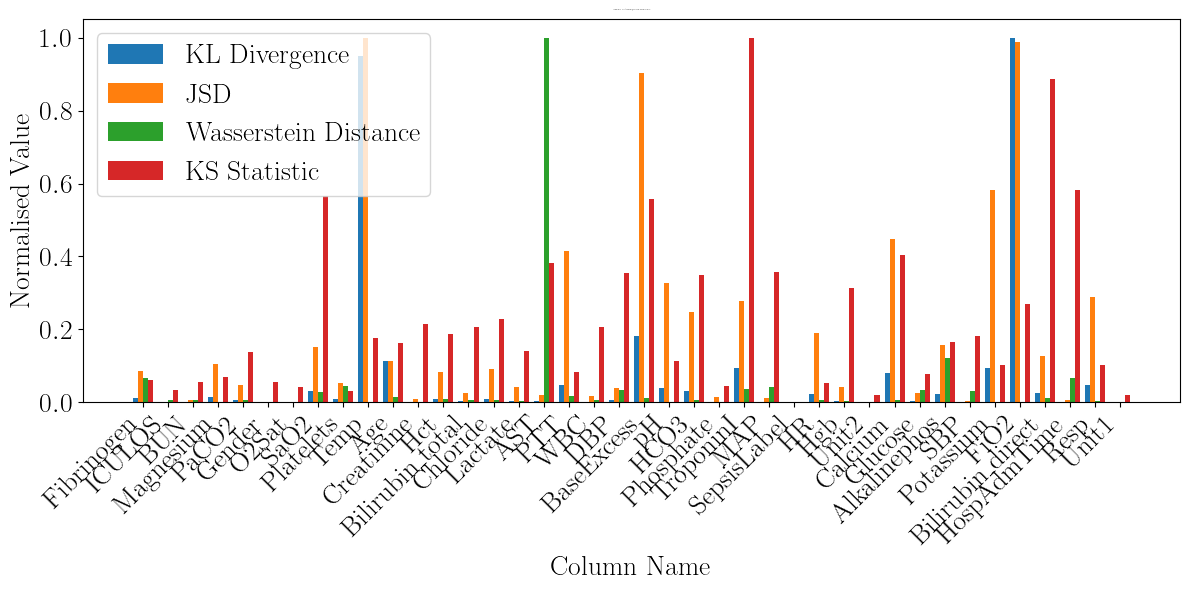

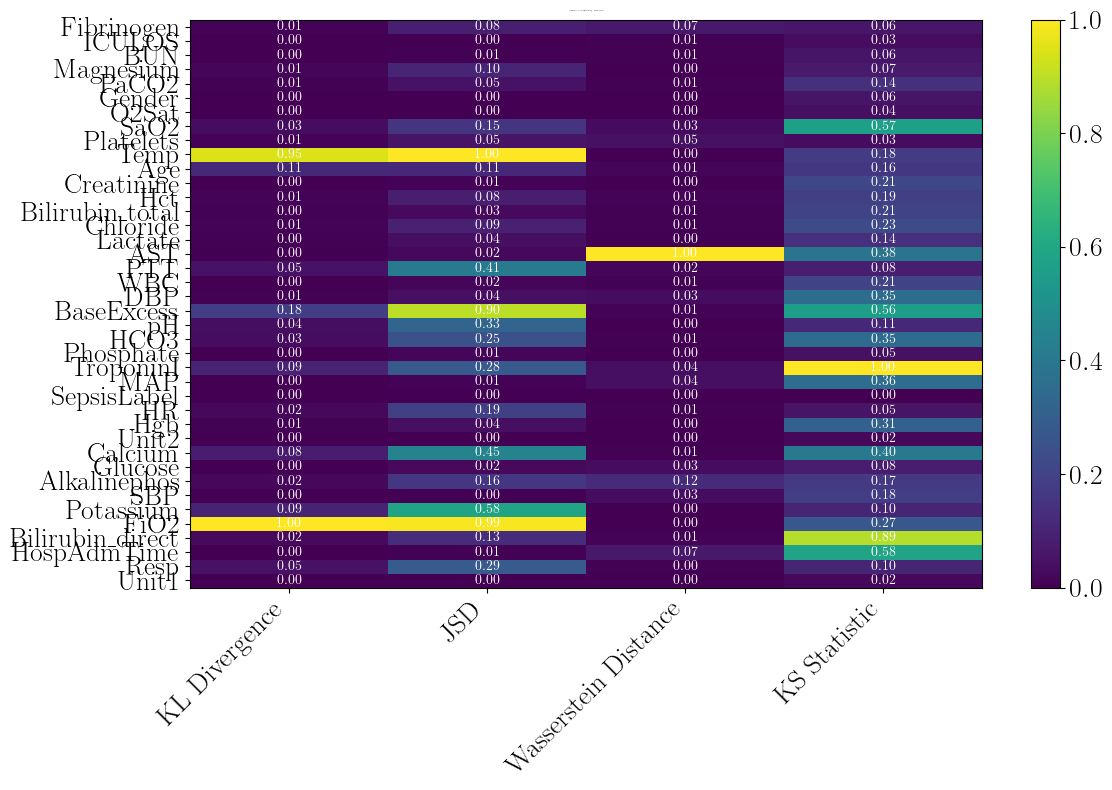

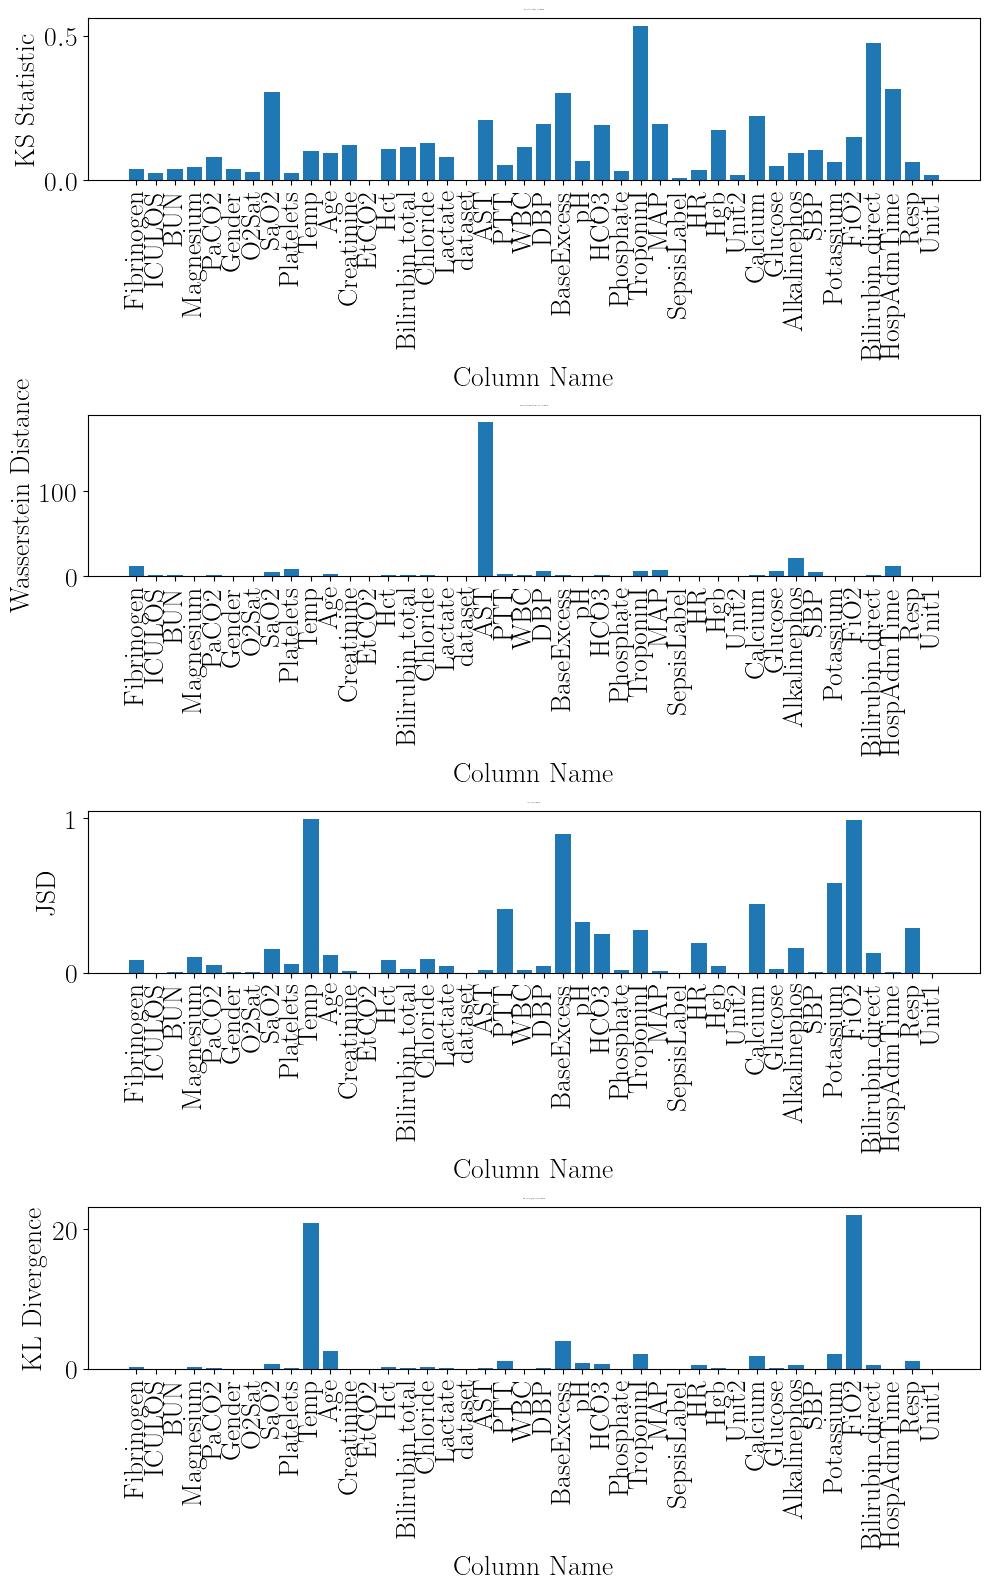

Column: Fibrinogen
  KS Statistic: 0.039377188133407036
  KS p-value: 0.0008831279244572754
  Wasserstein Distance: 12.235404742668445
  JSD: 0.08485503297496556
  KL Divergence: 0.2452034513230876
  Valid Merge: False


Column: ICULOS
  KS Statistic: 0.024665571796233632
  KS p-value: 1.8674582084984578e-205
  Wasserstein Distance: 1.0975320514476592
  JSD: 0.0008859414973736711
  KL Divergence: 0.002422480734979869
  Valid Merge: False


Column: BUN
  KS Statistic: 0.03709806601673357
  KS p-value: 6.882223245637217e-31
  Wasserstein Distance: 1.132904204555499
  JSD: 0.006992754393995427
  KL Divergence: 0.01990432856288554
  Valid Merge: False


Column: Magnesium
  KS Statistic: 0.04455450728173094
  KS p-value: 6.3315297176472e-40
  Wasserstein Distance: 0.029696380927072615
  JSD: 0.10436485159356072
  KL Divergence: 0.30809088055566036
  Valid Merge: False


Column: PaCO2
  KS Statistic: 0.0799150977295201
  KS p-value: 2.5252269568029688e-76
  Wasserstein Distance: 1.3771102233

In [ ]:

importlib.reload(analyse_data)
metrics = analyse_data.compare_two_datasets(df_A, df_B)
analyse_data.plot_combined_metrics(metrics)
analyse_data.plot_combined_heatmap(metrics)
analyse_data.plot_metrics(metrics)

for col, met in metrics.items():
    print(f"Column: {col}")
    for metric, value in met.items():
        print(f"  {metric}: {value}")
    print("\n")
#open text editor to view



In [ ]:
#WIP
import impute_data
importlib.reload(impute_data)
df_imputed = impute_data.impute_df(combined_df)
print(df_imputed.head())

                 HR  O2Sat    Temp    SBP     MAP  DBP  Resp      EtCO2  \
patient_id                                                                
1          0    NaN    NaN  36.778    NaN     NaN  NaN   NaN  32.957657   
           1   97.0   95.0  36.778   98.0  75.330  NaN  19.0  32.957657   
           2   89.0   99.0  36.778  122.0  86.000  NaN  22.0  32.957657   
           3   90.0   95.0  36.778  122.0  88.665  NaN  30.0  32.957657   
           4  103.0   88.5  36.778  122.0  91.330  NaN  24.5  32.957657   

              BaseExcess  HCO3  ...  Platelets    Age  Gender     Unit1  \
patient_id                      ...                                       
1          0   20.714286  46.5  ...      327.5  83.14       0  0.496571   
           1   20.714286  46.5  ...      327.5  83.14       0  0.496571   
           2   20.714286  46.5  ...      327.5  83.14       0  0.496571   
           3   24.000000  46.5  ...      327.5  83.14       0  0.496571   
           4   20.714286